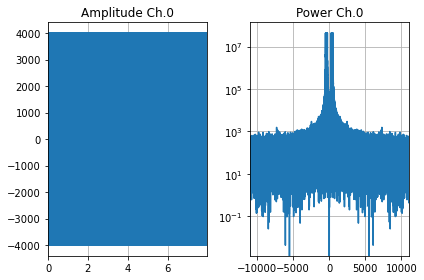

In [3]:
import numpy as np
import scipy.fft as spfft
from scipy.signal import spectrogram
from scipy.io.wavfile import read
import matplotlib.pyplot as plt

class ShowWav:
    def __init__( self, fname ):
        # ファイル名，データ読み込みなど
        self.fname = fname
        y = read(fname)
        self.Fs = y[0]
        self.ydat = y[1]
        self.Nmax = self.ydat.shape[0]
        
        if self.ydat.ndim > 1:
            self.channel = self.ydat.shape[1]
        else:
            self.channel = 1
            self.ydat = self.ydat.reshape((self.Nmax, 1))
        self.delta = 1.0 / self.Fs
        self.fdelta = 1.0 / (self.Nmax * self.delta)
        self.t = np.arange(self.Nmax) * self.delta
        self.f = np.arange(-self.Nmax / 2, self.Nmax / 2) * self.fdelta

    def plot( self ):
        # チャネル毎のデータの表示
        for k in range(self.channel):
            yy = self.ydat[: self.Nmax, k]
            
            plt.figure()
            
            plt.subplot(1, 2, 1)
            plt.plot(self.t, yy)
            plt.xlim(0, self.t[-1])
            plt.title("Amplitude Ch.%d" % k)
            plt.grid()
            
            Y = spfft.fft(yy)
            
            plt.subplot(1, 2, 2)
            plt.xlim(self.f[0], self.f[-1])
            plt.semilogy(self.f, np.abs(spfft.fftshift(Y)))
            plt.title("Power Ch.%d" % k)
            plt.grid()
            
            plt.tight_layout()
            plt.show()
            
    def plot_spectrogram(self):
        for k in range(self.channel):
            plt.figure()
            
            yy = self.ydat[: self.Nmax, k]
            
            plt.subplot(2, 1, 1)
            plt.plot(self.t, yy)
            plt.xlim(0, self.t[-1])
            plt.title("Amplitude Ch.%d" % k)
            plt.grid()
            
            plt.subplot(2, 1, 2)
            freqs, tt, Sxx = spectrogram(yy, self.Fs)
            plt.pcolormesh(tt, freqs, np.log(Sxx), shading="auto", cmap="jet")
            plt.xlim(0, tt[-1])
            
            plt.tight_layout()
            plt.show()


# クラスを定義したら，音ファイルを指定して実験してみる
fname = 'KyokoSampling.wav'

s = ShowWav( fname )
s.plot()